In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras import activations


In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [7]:
train_data.corr()['price_range'].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [58]:
X_train = train_data[['battery_power', 'px_width', 'ram', 'px_height', 'int_memory', 'sc_w']]
X_test = test_data[['battery_power', 'px_width', 'ram', 'px_height', 'int_memory', 'sc_w']]

y_train = train_data['price_range']

6


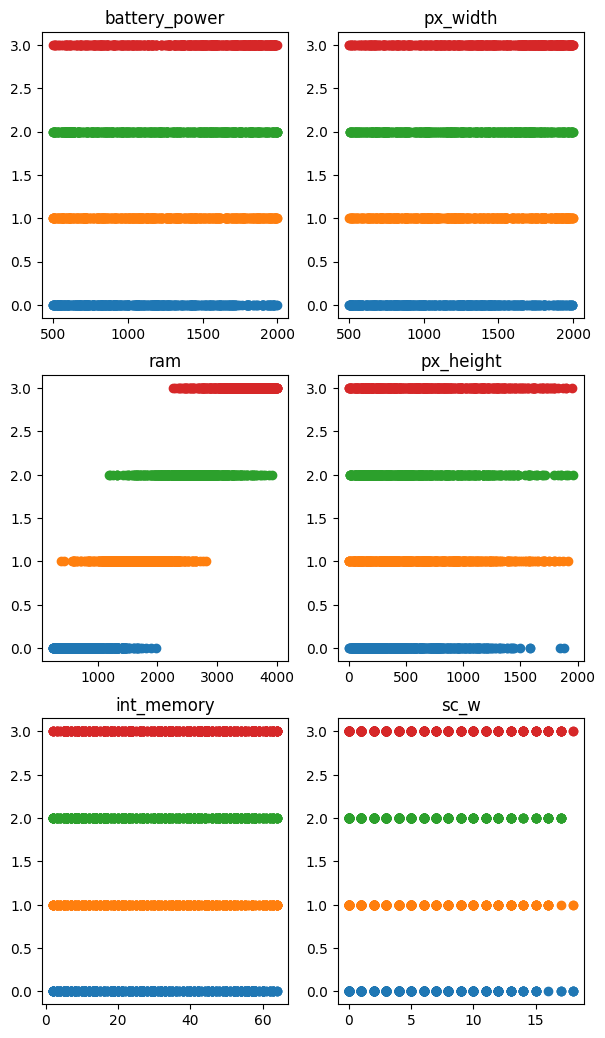

In [63]:
n = X_train.shape[1]
print(n)
plt.figure(figsize=(7, n + 20))

for i in range(n):
    plt.subplot(n, 2, i + 1)
    plt.title(X_train.columns[i])
    plt.scatter(X_train[X_train.columns[i]][y_train == 0], y_train[y_train == 0], marker='o')
    plt.scatter(X_train[X_train.columns[i]][y_train == 1], y_train[y_train == 1], marker='o')
    plt.scatter(X_train[X_train.columns[i]][y_train == 2], y_train[y_train == 2], marker='o')
    plt.scatter(X_train[X_train.columns[i]][y_train == 3], y_train[y_train == 3], marker='o')

plt.show()

In [86]:
tf.random.set_seed(20230621) # para resultados consistentes

modelo = Sequential(
    [
        # tf.keras.Input(shape=(4,)),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='linear'),
    ],
    name='mobile_price'
)

In [91]:
modelo.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001 * 0.9),
)

historico = modelo.fit(
    X_train, y_train,
    epochs=500
)

Epoch 1/500
63/63 [==============================] - 1s 2ms/step - loss: 0.1463
Epoch 2/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1865
Epoch 3/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1412
Epoch 4/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1336
Epoch 5/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1247
Epoch 6/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 7/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 8/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1343
Epoch 9/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1321
Epoch 10/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1422
Epoch 11/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1512
Epoch 12/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 13/500
63/63 [=================

In [92]:
modelo.summary()

Model: "mobile_price"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 6)                 42        
                                                                 
 dense_24 (Dense)            (None, 4)                 28        
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


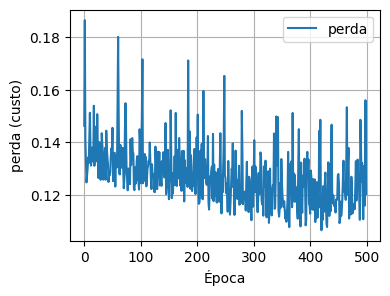

In [94]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(historico.history['loss'][:], label='perda')
# ax.set_ylim([0, 0.03])
ax.set_xlabel('Época')
ax.set_ylabel('perda (custo)')
ax.legend()
ax.grid(True)
plt.show()

In [98]:
previsao = modelo.predict([X_train[0:]])

probabilidades = tf.nn.softmax(previsao)

print(f" probabilidades: \n{probabilidades*100}")
print(f"Soma das probabilidades: {np.sum(probabilidades)*100:0.3f}")
print(f"Conclusão: a rede neural está nos dizendo que trata-se de um {y_train[0]} com  {100*probabilidades[0,2].numpy()} % de certeza")

63/63 [==============================] - 0s 2ms/step
 probabilidades: 
[[1.0508712e-04 9.8746208e+01 1.2536865e+00 9.3181562e-08]
 [2.9075166e-19 3.6758243e-04 9.5171623e+01 4.8280034e+00]
 [1.5916979e-14 4.8291121e-02 9.9844482e+01 1.0722414e-01]
 ...
 [2.0048419e-36 9.4916520e-14 2.8480589e-02 9.9971512e+01]
 [9.9990379e+01 9.6205110e-03 6.4633066e-10 1.0718108e-22]
 [1.0992236e-26 5.0938304e-08 9.4188461e+00 9.0581146e+01]]
Soma das probabilidades: 200000.000
Conclusão: a rede neural está nos dizendo que trata-se de um 1 com  1.2536865659058094 % de certeza


In [ ]:
# Previsão usando a nossa rede neural
prediction   = modelo.predict(X[random_index].reshape(1,400))
prediction_p = tf.nn.softmax(prediction)
yhat         = np.argmax(prediction_p)

In [ ]:
Saidas = modelo.predict(X) # calcula a saída da rede neural para todos os exemplos de treinamento

print("maior saída:", np.max(Saidas), "     menor saída:", np.min(Saidas))

Probabilidades = tf.nn.softmax(Saidas).numpy()

print("maior probabilidade:", np.max(Probabilidades), "     menor probabilidade:", np.min(Probabilidades))

Yhat = np.argmax(Probabilidades,axis=1).reshape(-1,1)

qtdade_digitos_errados = np.sum(Yhat!=y)
qtdade_digitos         = X.shape[0]
print(f"{qtdade_digitos_errados} imagens classificadas incorretamente de um total de {qtdade_digitos} imagens")

taxa_acerto = np.mean((Yhat==y)*100)
print(f"taxa de acerto (%): {taxa_acerto}")